<a href="https://www.kaggle.com/code/collinslemeke/diabetes-risk-predictor?scriptVersionId=246707705" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 

from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Data Collection and Exploration

In [2]:
dbts = pd.read_csv("/kaggle/input/diabetes-risk-predictor-dataset/diabetes_prediction.csv")
print()
print("BELOW IS YOUR TABULATED DATA")
print("============================")
dbts.head()


BELOW IS YOUR TABULATED DATA


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
print()
print("BELOW IS YOUR DATA SUMMARY")
print("==========================")
print()
dbts.info()

print()

shape = dbts.shape
print("The shape of this data is :", shape, "rows and columns respectively")


BELOW IS YOUR DATA SUMMARY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

The shape of this data is : (100000, 9) rows and columns respectively


In [4]:
dbts.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

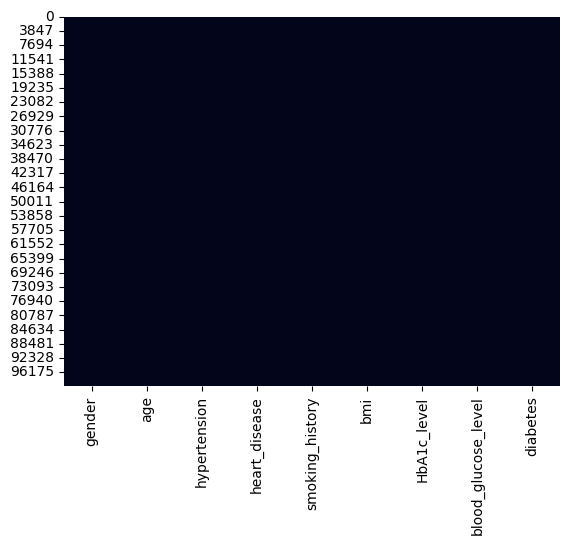

In [5]:
sns.heatmap(dbts.isnull(), cbar = False)
plt.show

The heatmap provides a quick overview of missing values, allowing you to identify patterns or areas where data is incomplete.

In [6]:
unique_values = dbts['diabetes'].unique()
print("The unique values in the column 'diabetes' are :", unique_values)

print()

unique_total = dbts['diabetes'].value_counts()
print("The total number of unique values in the 'diabetes' column is :", unique_total)

The unique values in the column 'diabetes' are : [0 1]

The total number of unique values in the 'diabetes' column is : diabetes
0    91500
1     8500
Name: count, dtype: int64


In [7]:
scaler = MinMaxScaler()

columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
dbts[columns_to_scale] = scaler.fit_transform(dbts[columns_to_scale])
dbts

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.000000,0,1,never,0.177171,0.563636,0.272727,0
1,Female,0.674675,0,0,No Info,0.202031,0.563636,0.000000,0
2,Male,0.349349,0,0,never,0.202031,0.400000,0.354545,0
3,Female,0.449449,0,0,current,0.156863,0.272727,0.340909,0
4,Male,0.949950,1,1,current,0.118231,0.236364,0.340909,0
...,...,...,...,...,...,...,...,...,...
99995,Female,1.000000,0,0,No Info,0.202031,0.490909,0.045455,0
99996,Female,0.024024,0,0,No Info,0.085901,0.545455,0.090909,0
99997,Male,0.824825,0,0,former,0.207983,0.400000,0.340909,0
99998,Female,0.299299,0,0,never,0.296569,0.090909,0.090909,0


In [8]:
print()
print("One-Hot-Encoder Successful!!!")
print()
columns_to_encode = ['gender', 'smoking_history']

encoded_data = pd.get_dummies(dbts, columns = columns_to_encode)
encoded_data.head()


One-Hot-Encoder Successful!!!



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.177171,0.563636,0.272727,0,True,False,False,False,False,False,False,True,False
1,0.674675,0,0,0.202031,0.563636,0.000000,0,True,False,False,True,False,False,False,False,False
2,0.349349,0,0,0.202031,0.400000,0.354545,0,False,True,False,False,False,False,False,True,False
3,0.449449,0,0,0.156863,0.272727,0.340909,0,True,False,False,False,True,False,False,False,False
4,0.949950,1,1,0.118231,0.236364,0.340909,0,False,True,False,False,True,False,False,False,False


<function matplotlib.pyplot.show(close=None, block=None)>

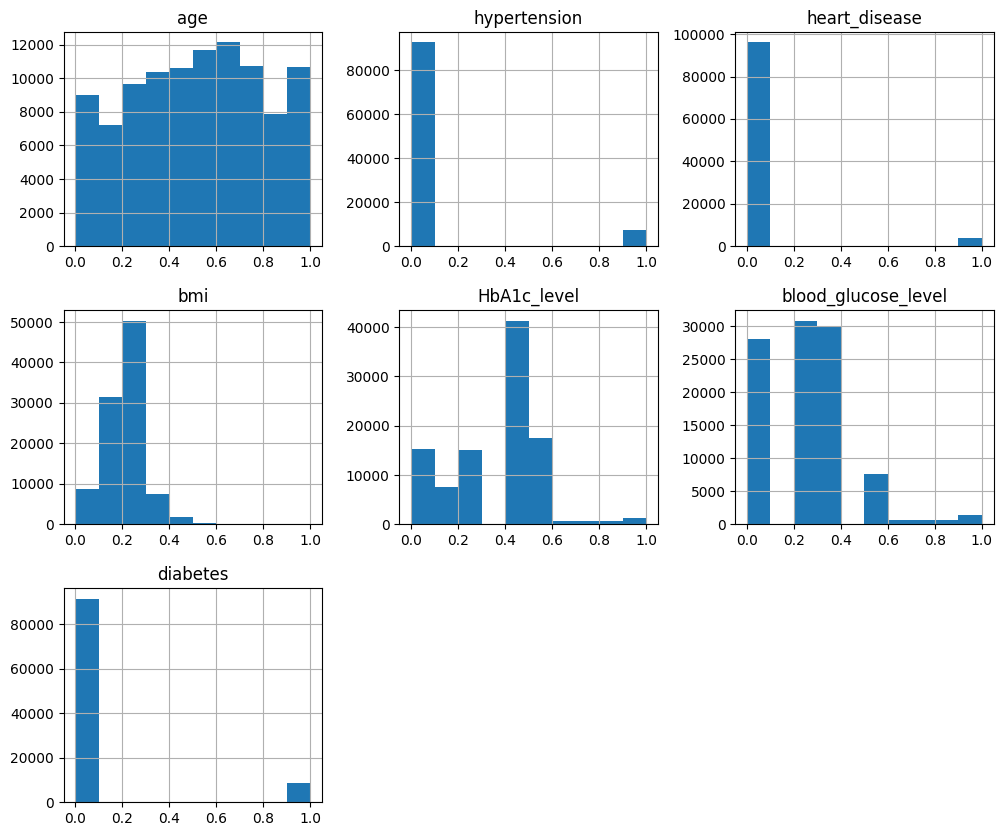

In [9]:
encoded_data.hist(figsize = (12,10))
plt.show

The histogram provides insights into the distribution of values within the dataset, allowing you to visualize the frequency of different values or ranges of values.

In [10]:
X = encoded_data.drop(['diabetes'], axis = 1)
y = encoded_data['diabetes']

### Data splitting into X features and y label 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
print("The shape of X is :", X.shape)
print("The shape of y is :", y.shape)

The shape of X is : (100000, 15)
The shape of y is : (100000,)


### Train data on the Logistic Regression Classification Algorithm

In [13]:
print("Training in Progress....................")
print()
print("Training Successfully!!!")

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Training in Progress....................

Training Successfully!!!


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate the Model

In [14]:
print("Evaluating Model Performance...")
print()
print("Evaluation Successful!!!")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Evaluating Model Performance...

Evaluation Successful!!!


In [15]:
print("YOUR MODEL PERFORMANCE BELOW")
print("============================")
print()
print("Your Model Accuracy Score is: ", accuracy)
print("Your Model Precision Score is: ", precision)
print("Your Model Recall Score is: ", recall)
print("Your Model f1 Score is: ", f1)

YOUR MODEL PERFORMANCE BELOW

Your Model Accuracy Score is:  0.9591
Your Model Precision Score is:  0.8689883913764511
Your Model Recall Score is:  0.6135831381733021
Your Model f1 Score is:  0.7192862045298559


Based on the provided performance metrics of your model, here's how you can interpret them:

1. Accuracy: The accuracy score of 0.9591 indicates that your model correctly classified approximately 95.91% of the instances in the evaluation data. It measures the overall correctness of the predictions.

2. Precision: The precision score of 0.8689 suggests that when your model predicts a positive class, it is correct about 86.89% of the time. Precision measures the ability of the model to avoid false positives.

3. Recall: The recall score of 0.6136 means that your model identified approximately 61.36% of the true positive instances correctly. Recall, also known as sensitivity or true positive rate, measures the ability of the model to find all the positive instances.

4. F1 Score: The F1 score of 0.7193 combines both precision and recall into a single metric. It is the harmonic mean of precision and recall and provides a balanced measure of the model's performance.